<a href="https://colab.research.google.com/github/ThiagoSViana/Projects/blob/main/FreeCode_SeaLevel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from scipy.stats import linregress

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Reading data from file
df = pd.read_csv("/content/drive/MyDrive/epa-sea-level.csv")

In [ ]:
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


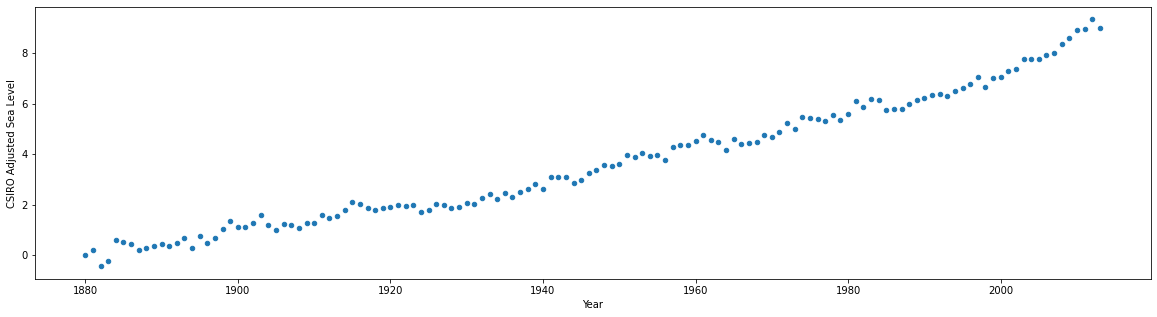

In [ ]:
#Scatter Plot following the instructions

df.plot.scatter(x='Year', y="CSIRO Adjusted Sea Level", figsize=(20, 5))
sr1 = pd.Series([int(i) for i in range(1880, 2050)])

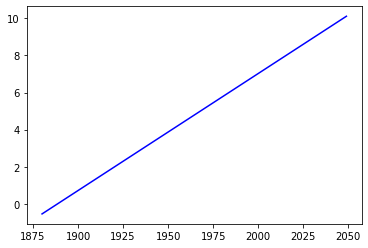

In [ ]:
# First best line
slope, intercept, r_value, p_value, std_err  = linregress(df['Year'], df["CSIRO Adjusted Sea Level"])
plt.plot(sr1, intercept + slope*sr1, 'blue', label='best fit line (1880 to 2050)')

In [ ]:
# Second best line (after year 2000)
recent = df[df['Year'] >= 2000]
slope, intercept, r_value, p_value, std_err  = linregress(recent['Year'], recent["CSIRO Adjusted Sea Level"])

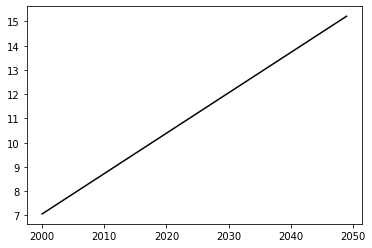

In [ ]:
sr2 = pd.Series([int(i) for i in range(2000, 2050)])
recent.append(sr2, ignore_index=True)
plt.plot(sr2, intercept + slope*sr2, 'r', label='new best fit line', color="black")

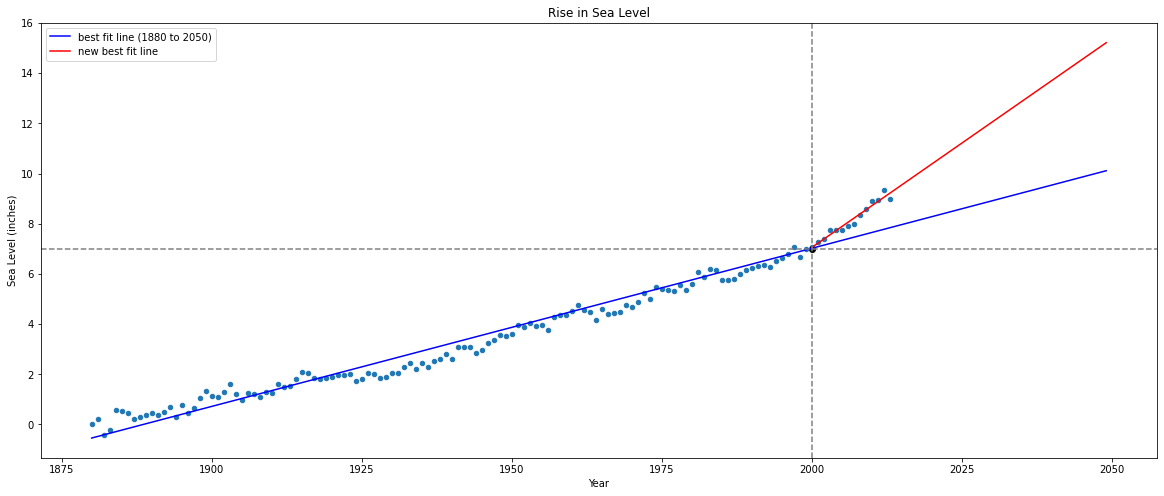

In [ ]:
df.plot.scatter(x='Year', y="CSIRO Adjusted Sea Level", figsize=(20, 8))
sr1 = pd.Series([int(year) for year in range(1880, 2050)])

# Plotting best line
slope, intercept, r_value, p_value, std_err  = linregress(df['Year'], df["CSIRO Adjusted Sea Level"])
plt.plot(sr1, intercept + slope*sr1, 'blue', label='best fit line (1880 to 2050)')

# Plotting the cecond best line after year 2000
recent = df[df['Year'] >= 2000]
slope, intercept, r_value, p_value, std_err  = linregress(recent['Year'], recent["CSIRO Adjusted Sea Level"])

sr2 = pd.Series([int(year) for year in range(2000, 2050)])
recent.append(sr2, ignore_index=True)
plt.plot(sr2, intercept + slope*sr2, 'black', label='new best fit line', color="red")

# Intercept point
plt.axvline(2000, color='gray', linestyle='--')
plt.axhline(7, color ='gray', linestyle='--')

plt.scatter(2000, 7, color='black')

plt.title("Rise in Sea Level")
plt.xlabel("Year")
plt.ylabel("Sea Level (inches)")
plt.legend()

plt.show()

In [ ]:
##This code is authoral but was inspired by the 'BENEDICT NEO' codes, founded here https://www.kaggle.com/code/benthecoder/global-sea-level-rise/notebook
#thank you!